Which pathway gives a higher expected net worth by age 40? Earning an associates degree in cybersecurity at a community college and then transferring to CU Boulder or going directly to a private university for a bachelor’s degree in cybersecurity, if we take into account Tuition, the probability of being employed each year, and the probability of graduating?

I am going to run 10,000 trials that will simulate different outcomes with a chance of being employed and chance of Graduating.

I am going to assume that the probability of graduating is independent from the probability of being employed. I will also assume that Living expenses and taxes are equal for both of the pathways. Each simulation will last 10 years after graduation. 

A possible bias in this simulation is employment probability being the same for all ten years, which doesn't account for the demand for the job possible changing. 

In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
num_trials = 10000
tuition_CU = [25000, 30000, 40000]
tuition_Private = [80000, 100000, 120000]
grad_prob_values = [0.6, 0.8, 1.0]
employment_prob_values = [0.7, 0.8, 0.9, 1.0]
salary_CU = 70000
salary_Private = 90000

In [15]:
def run_simulation(num_trials):
    data = []

    for _ in range(num_trials):
        X1_CU = random.choice(tuition_CU)
        X2_CU = random.choice(grad_prob_values)
        X3_CU = random.choice(employment_prob_values)

        X1_Private = random.choice(tuition_Private)
        X2_Private = random.choice(grad_prob_values)
        X3_Private = random.choice(employment_prob_values)


        W_CU = (X2_CU * X3_CU * salary_CU * 10) - X1_CU
        W_Private = (X2_Private * X3_Private * salary_Private * 10) - X1_Private

        data.append({"Pathway": "CU Boulder Transfer", "Net Worth": W_CU})
        data.append({"Pathway": "Private University", "Net Worth": W_Private})
        return pd.DataFrame(data)

In [16]:
df = run_simulation(num_trials)
expected_values = df.groupby("Pathway")["Net Worth"].mean()
print("Expected Net Worth After 10 Years:")
print(expected_values, "\n")
sns.set(style="whitegrid")

Expected Net Worth After 10 Years:
Pathway
CU Boulder Transfer    465000.0
Private University     386000.0
Name: Net Worth, dtype: float64 



/tmp/ipykernel_207/2518608036.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="Pathway", y="Net Worth", ci="sd", palette="viridis")


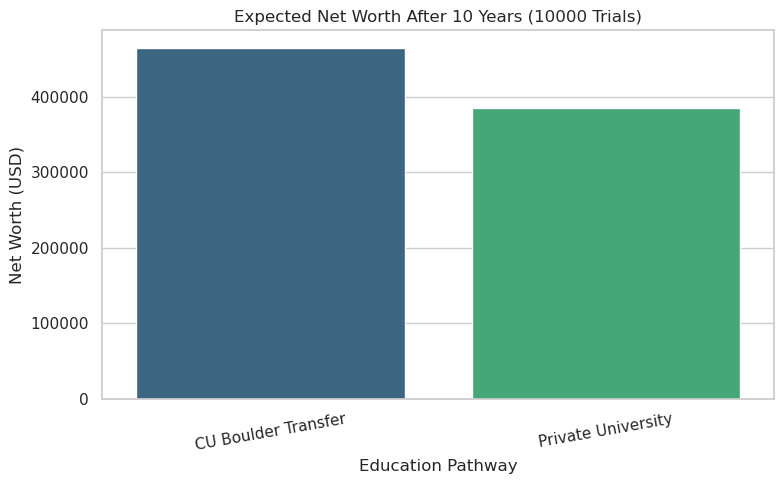

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Pathway", y="Net Worth", ci="sd", palette="viridis")
plt.title(f"Expected Net Worth After 10 Years ({num_trials} Trials)")
plt.ylabel("Net Worth (USD)")
plt.xlabel("Education Pathway")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

Based off of the simulation, the pathway where the student transferred to CU Boulder had a higher expected net worth after 10 years (Average was 465,000 dollars, compared to the average of the Private University Pathway which was 386,000 dollars). This differs from the Theoretical parameters which estimated that the CU pathway would have an average net worth of 474,000 dollars and the private pathway would have an average net worth of 672,500 dollars. The theoretical parameters estimated that the Private Pathway would have a higher average, but the empirical data from the simulation showed that the CU Boulder Transfer pathway actually was the better pathway.